In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io

In [3]:
## Function Definitions

def shrink(X,tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))
def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT
    return out
def RPCA(X):
    n1,n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1,n2))
    thresh = 10**(-7) * np.linalg.norm(X)
    
    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0
    while (np.linalg.norm(X-L-S) > thresh) and (count < 1000):
        L = SVT(X-S+(1/mu)*Y,1/mu)
        S = shrink(X-L+(1/mu)*Y,lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1
    return L,S

In [ ]:
plt.rcParams['figure.figsize'] = [15, 30]
plt.rcParams.update({'font.size': 18})

In [86]:
Y = np.zeros((76800, 30))
inds = list(range(1,30))

for i in inds :
    n = str(i)
    num = n.zfill(6)
    mat = scipy.io.loadmat(os.path.join('..','Machine Learning textbook','data','seq_'+num+'.mat'))
    Z = mat['M'][0:240,320:640].reshape(-1)
    Y[:,i] = Z                                    
                                        
Y

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0., 114., 116., ..., 122., 121., 122.],
       [  0., 112., 114., ..., 119., 120., 121.],
       [  0., 112., 116., ..., 118., 120., 121.]])

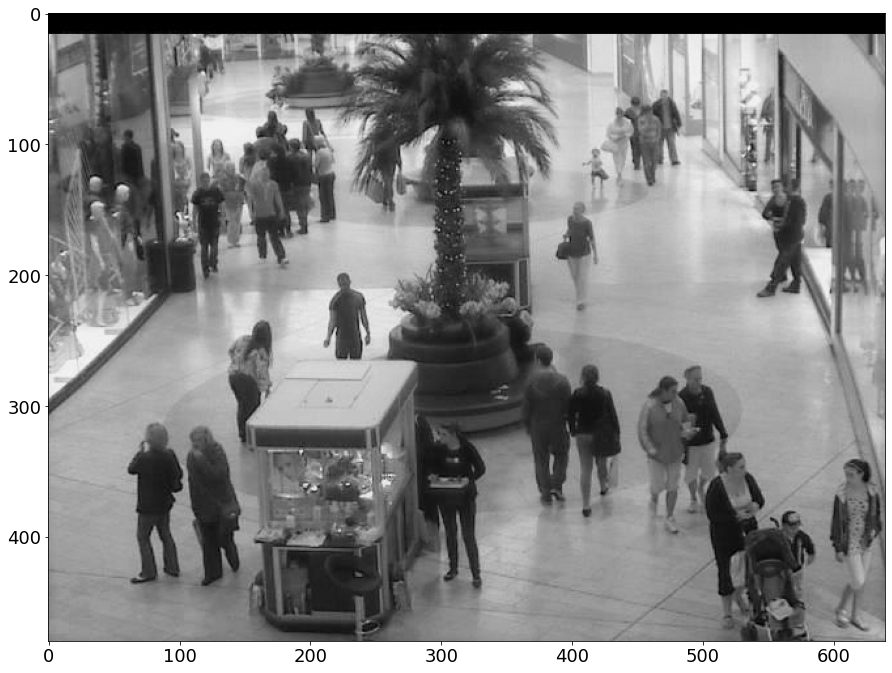

In [69]:
plt.imshow(np.reshape(Y[:,25], (480,640)),cmap='gray')

In [87]:
L,S = RPCA(Y)

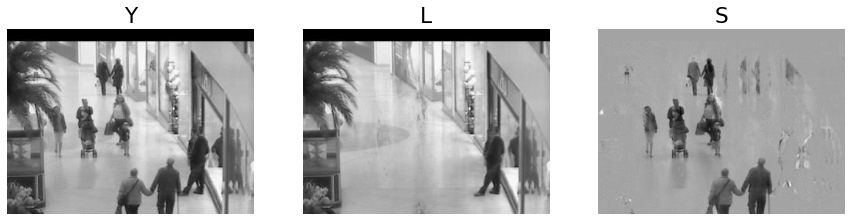

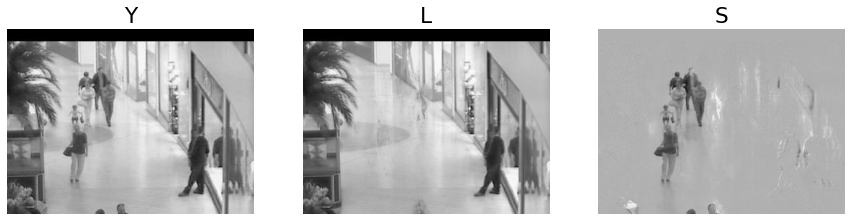

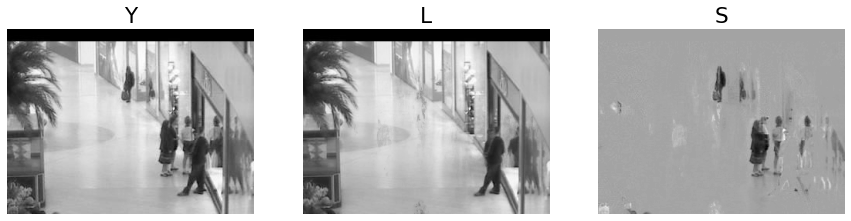

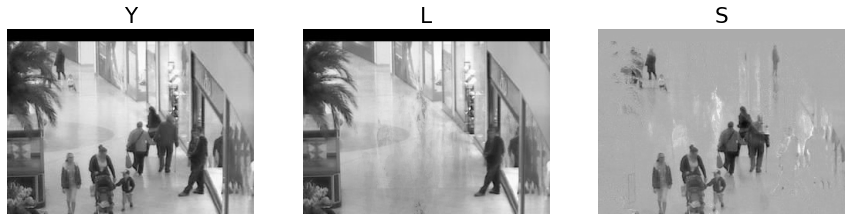

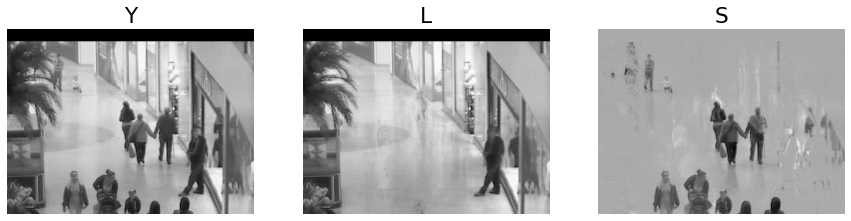

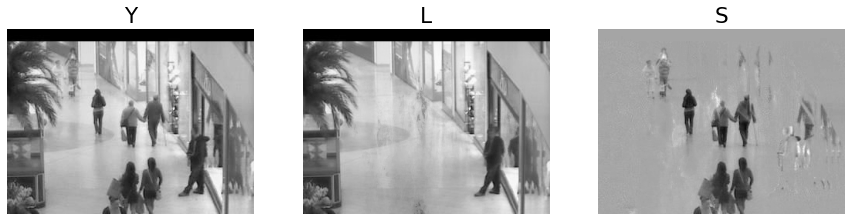

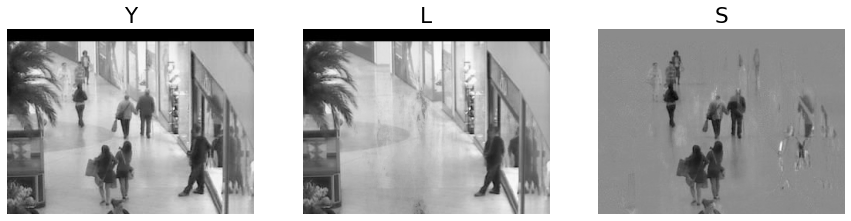

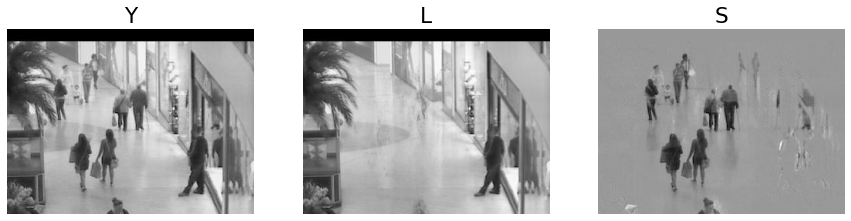

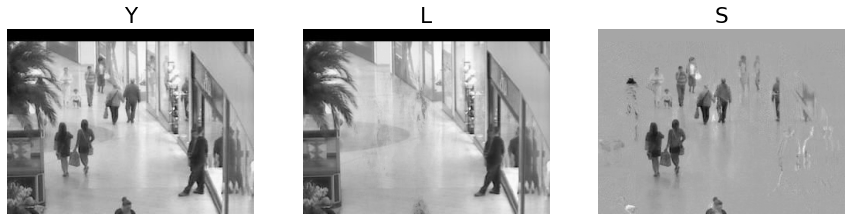

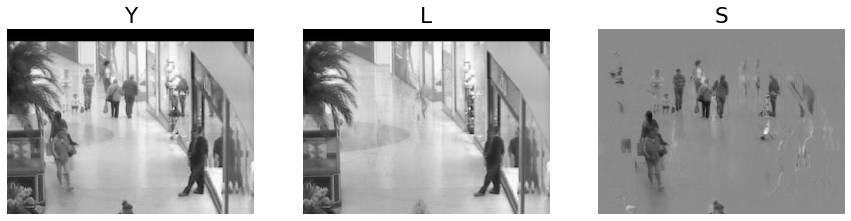

In [90]:
inds = (10,25,4,14,15,17,18,19,20,21)

for k in inds:
    fig,axs = plt.subplots(1,3)
    axs = axs.reshape(-1)
    axs[0].imshow(np.reshape(Y[:,k-1],(240,320)),cmap='gray')
    axs[0].set_title('Y')
    axs[1].imshow(np.reshape(L[:,k-1],(240,320)),cmap='gray')
    axs[1].set_title('L')
    axs[2].imshow(np.reshape(S[:,k-1],(240,320)),cmap='gray')
    axs[2].set_title('S')
    for ax in axs:
        ax.axis('off')